# Data Science Academy
#Fundamentos de Linguagem Python Para Análise de Dados e Data Science
#Lab 5
#Robô Trading com Inteligência Artificial em Linguagem Python
Problema de Negócio:

Construir um robô (modelo em Linguagem Python) baseado em Inteligência Artificial que aprenda a operar na bolsa de valores a partir de experimentos de compra e venda de ações. Dado um saldo inicial o modelo deve apresentar o resultado (lucro) a ser obtido depois de ações de compra e venda.
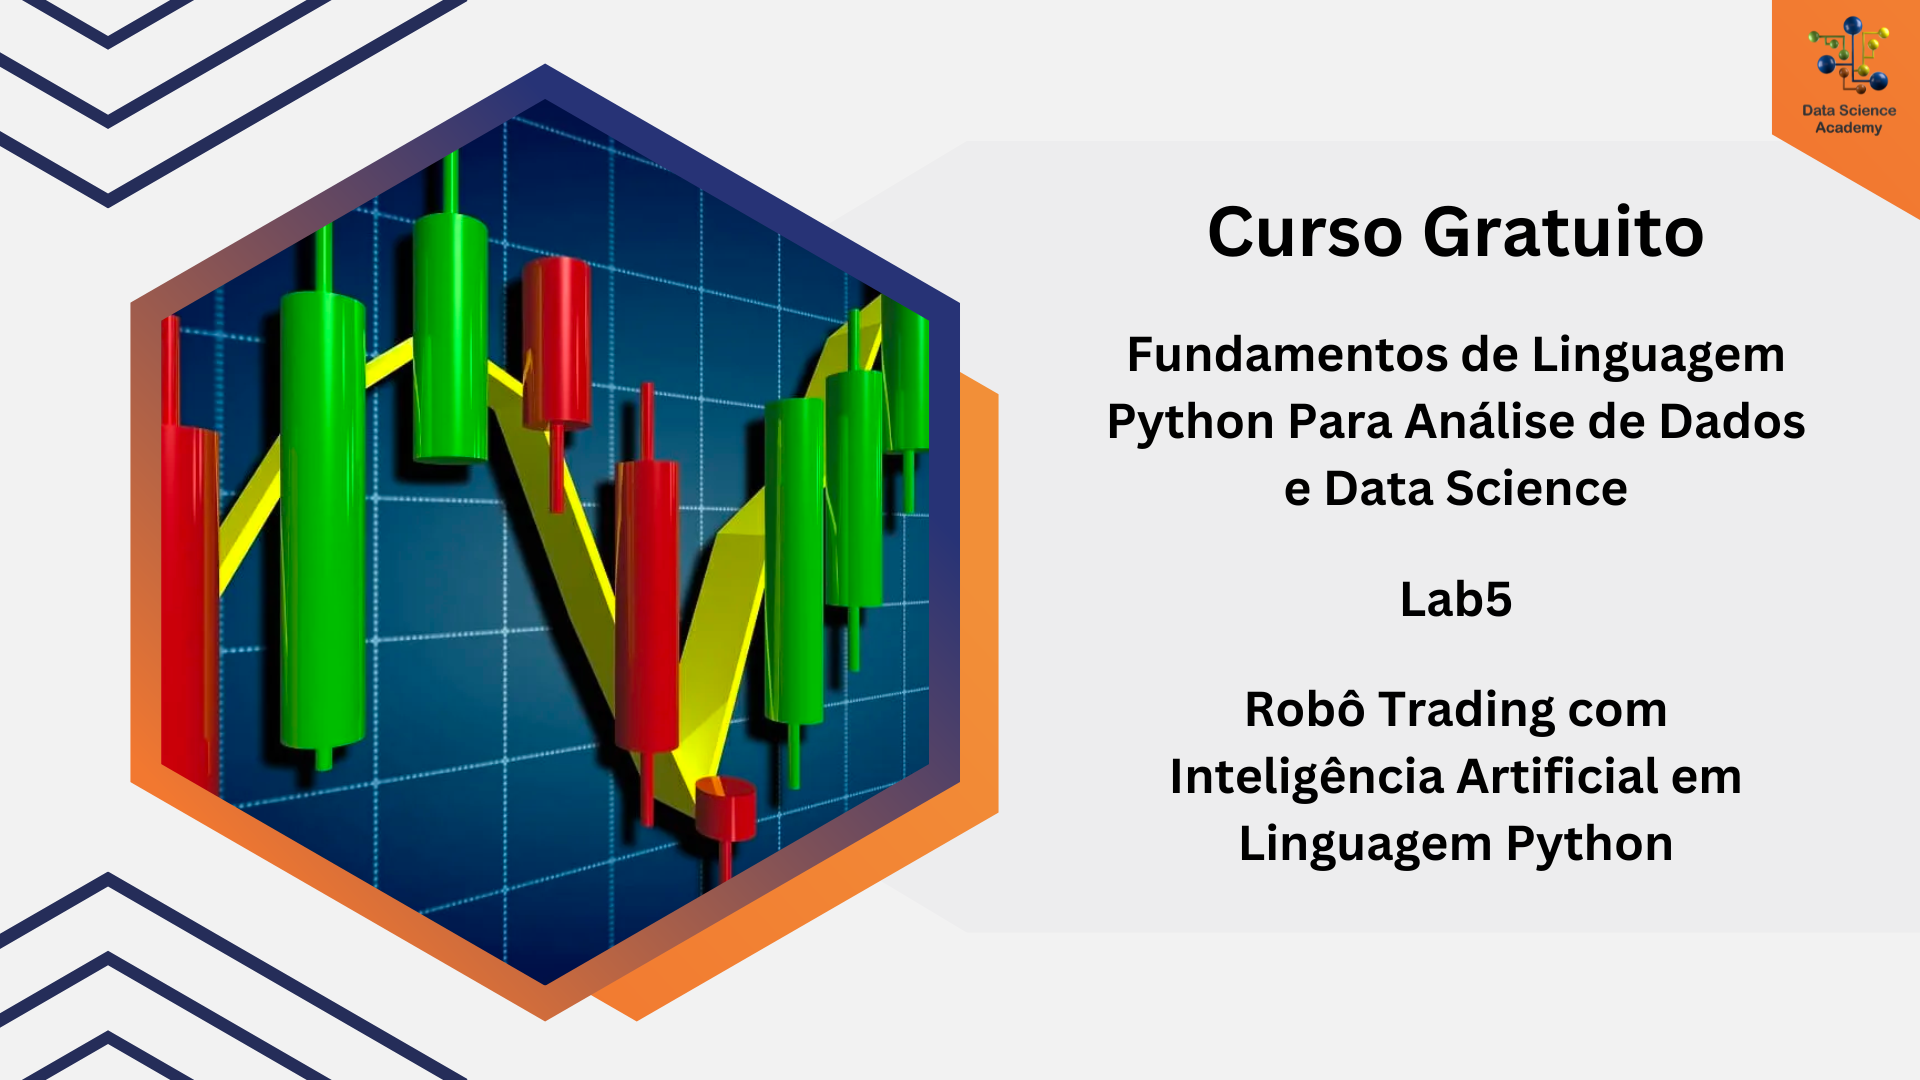

https://plotly.com/

In [ ]:
!pip install -q plotly

In [ ]:
# Imports
import random
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from datetime import datetime

##Carregando e Visualizando os dados com Candlestick

In [ ]:
# Carrega os dados
df=pd.read_csv('dataset.csv')

In [ ]:
df.shape

(506, 11)

In [ ]:
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


O Candlestick é um tipo de gráfico financeiro utilizado para descrever a movimentação de preços de determinados ativos (ações, criptomoedas, etc.). Em contraste com um gráfico de linha simples do preço de fechamento, ele oferece muito mais informações sobre a dinâmica dos preços - é baseado em dados OHLC, o que significa que contém os preços de abertura, alta, baixa e fechamento (geralmente junto com o volume). Esses valores podem ser mostrados em diferentes frequências de amostragem (minuto, hora, dia, semana, etc.) e são frequentemente usados como base para análises técnicas.

https://plotly.com/python/candlestick-charts/

In [ ]:
# Candlestick
fig=go.Figure(data=[go.Candlestick(x=df['Date'],
                                   open=df['AAPL.Open'],
                                   high=df['AAPL.High'],
                                   low=df['AAPL.Low'],
                                   close=df['AAPL.Close'])])
fig.show()

In [ ]:
# Vamos trabalhar com a cotação de fechamento da ação da Apple
# O robô irá utilizar os dados de fechamento para aprender a operar na bolsa
precos=df['AAPL.Close'].values

In [ ]:
type(precos)

numpy.ndarray

##Configuração do algortimo Q-learning

In [ ]:
# Configuração do Q-Learning
print('\nDefinindo os hiperparâmetros do Q-Learning...')
num_episodios=1000
alfa=0.1
gama=0.39
epsilon=0.1


Definindo os hiperparâmetros do Q-Learning...


##Configuração do ambiente de negociação

In [ ]:
# Configuração do ambiente de negociação
print('\nConfigurando o Ambiente de Negociação...')
acoes=['comprar','vender','manter']
saldo_inicial=1000
num_acoes_inicial=0


Configurando o Ambiente de Negociação...


##Função para executar as ações (Passos) do Robô Trading

In [ ]:
# Função para executar uma ação e retornar a recompensa e o próximo estado
def executar_acao(estado, acao, saldo, num_acoes, preco):

  # Ação de comprar
  if acao==0:
    if saldo>=preco:
      num_acoes+=1
      saldo-=preco

  # Ação de vender
  elif acao==1:
    if num_acoes>0:
      num_acoes-=1
      saldo+=preco

  # Define o lucro
  lucro=saldo+num_acoes*preco-saldo_inicial

  return(saldo, num_acoes, lucro)

##Treinamento do Robô

In [ ]:
# Inicializar a tabela Q
print('\nInicializando a Tabela Q...')
q_tabela=np.zeros((len(precos),len(acoes)))


Inicializando a Tabela Q...


In [ ]:
# Treinamento
print('\nInicializando o Treinamento...')
for _ in range(num_episodios):

  # Define o saldo
  saldo=saldo_inicial

  # Define o número de ações
  num_acoes=num_acoes_inicial

  # Loop
  for i, preco in enumerate(precos[:-1]):

    estado=i

    # Escolher a ação usando a política epsilon-greedy
    if np.random.random()<epsilon:
      acao=random.choice(range(len(acoes)))
    else:
      acao=np.argmax(q_tabela[estado])

    # Executar a ação e obter a recompensa e o próximo estado
    saldo, num_acoes, lucro=executar_acao(estado,acao,saldo,num_acoes,preco)
    prox_estado=i+1

    # Atualiza a tabela Q
    q_tabela[estado][acao]+=alfa*(lucro+gama*np.max(q_tabela[prox_estado])- q_tabela[estado][acao])

print('\nTreinamento Concluído...')


Inicializando o Treinamento...

Treinamento Concluído...


##Executando o Robô Trading e prevendo o Lucro de operações na bolsa de valores

In [ ]:
# Valores iniciais para testar o agente
saldo=saldo_inicial
num_acoes=num_acoes_inicial

In [ ]:
print('\nExecutando o agente...')
for i, preco in enumerate(precos[:-1]):
  estado=i
  acao=np.argmax(q_tabela[estado])
  saldo, num_acoes, _=executar_acao(estado,acao,saldo,num_acoes,preco)

print('\nExecução concluída...')


Executando o agente...

Execução concluída...


In [ ]:
num_acoes

2

In [ ]:
precos[-1]

np.float64(135.350006)

In [ ]:
# Vendendo todas as ações no último preço
saldo+=num_acoes*precos[-1]
lucro=saldo-saldo_inicial
lucro_final=round(lucro,2)

In [ ]:
print(f"\nComeçamos a Negociação com Saldo Inicial de 1000 e Tivemos Lucro de: {lucro_final}")


Começamos a Negociação com Saldo Inicial de 1000 e Tivemos Lucro de: 140.23


In [ ]:
print("\nObrigado Por Usar o Robô Trading do Curso Gratuito da DSA.\n")


Obrigado Por Usar o Robô Trading do Curso Gratuito da DSA.



##Fim